# Mini-Projet Traitement du Signal

Romain LAGARDE, Tom SCHIPPKE


**QUESTIONS:**


-repr√©sentation spectrale, repr√©senter les amplitudes <0 ??

-bonne id√©e de "filtrer" des le d√©but

-I-C tout ca pr prendre n=1 ?? Int√©ret ?

-justification du III

-II-C bizarre 

**A faire**

dans II, III questions d'interpr√©tation √† adapter


In [41]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt


## I. Modulation et d√©modulation DSB-SC

### A. Modulation



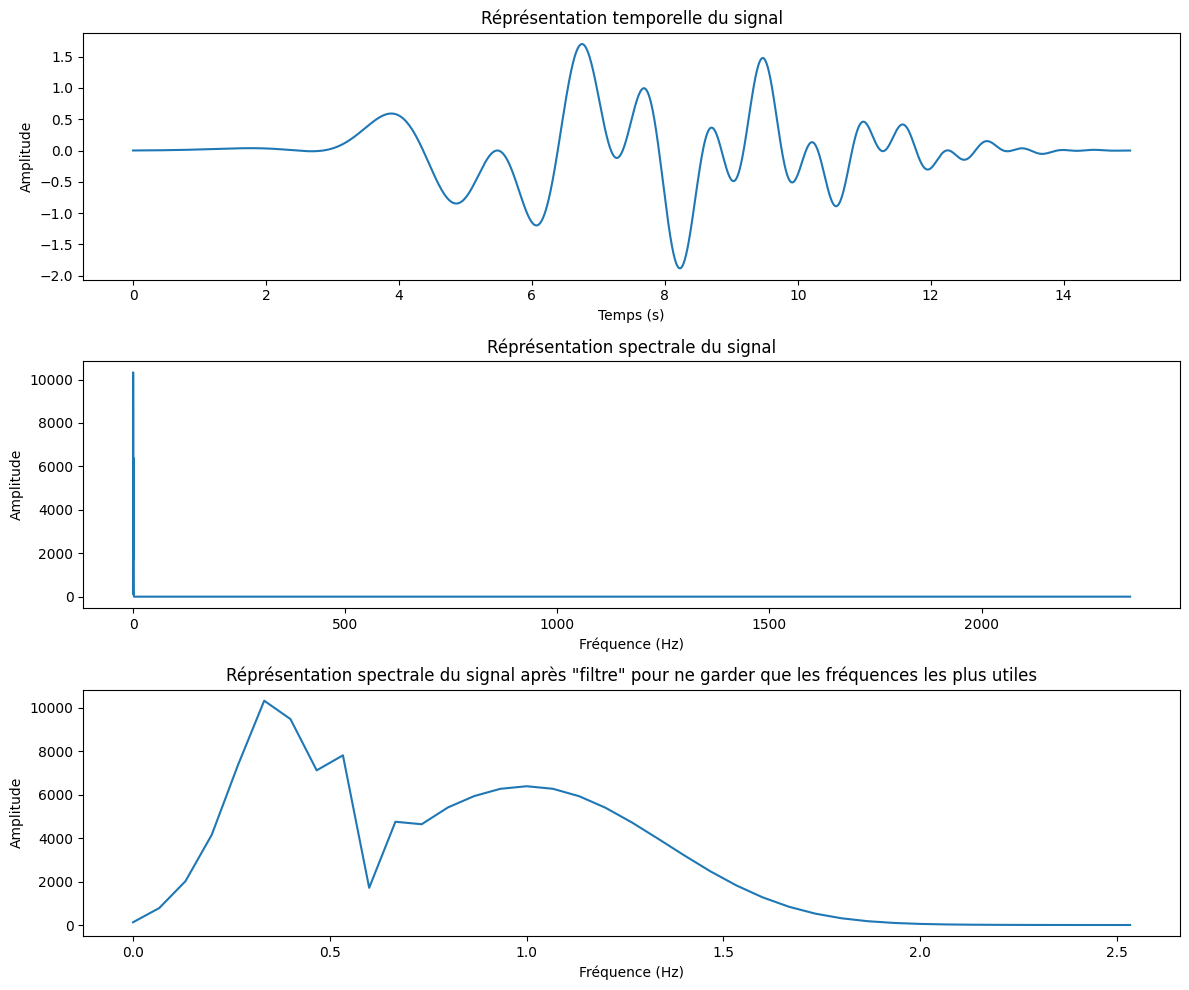

In [42]:
fc = 47.0 # carrier frequency
finfty = fc*1e2 # very high "continuous" frequency
T = 15. # duration of signal
N = round(finfty*T) # number of samples

t = np.arange(0.0, N)/finfty
pulsation1 = 2*np.pi*t/T
pulsation2 = 2*np.pi/np.sqrt(7)*t/T

xRaw = np.cos(pulsation1*t) + np.sin(pulsation2*t)

window = sig.windows.kaiser(N,9)
x = xRaw*window


plt.figure(figsize=(12, 10))

#Repr√©sentation temporelle du signal
plt.subplot(3, 1, 1)
plt.plot(t,x)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal')

#Repr√©sentation de la fft du signal

X=np.fft.fft(x)
freq=np.fft.fftfreq(N, d=1/finfty)



plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X[:N//2]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal')

indice_√†_garder = np.abs(X) > 1
X_tild=X[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild[freq_tild>=0],np.abs(X_tild[freq_tild>=0]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()


La Fr√©quence maximale du signal est approximativement **B=2Hz**.


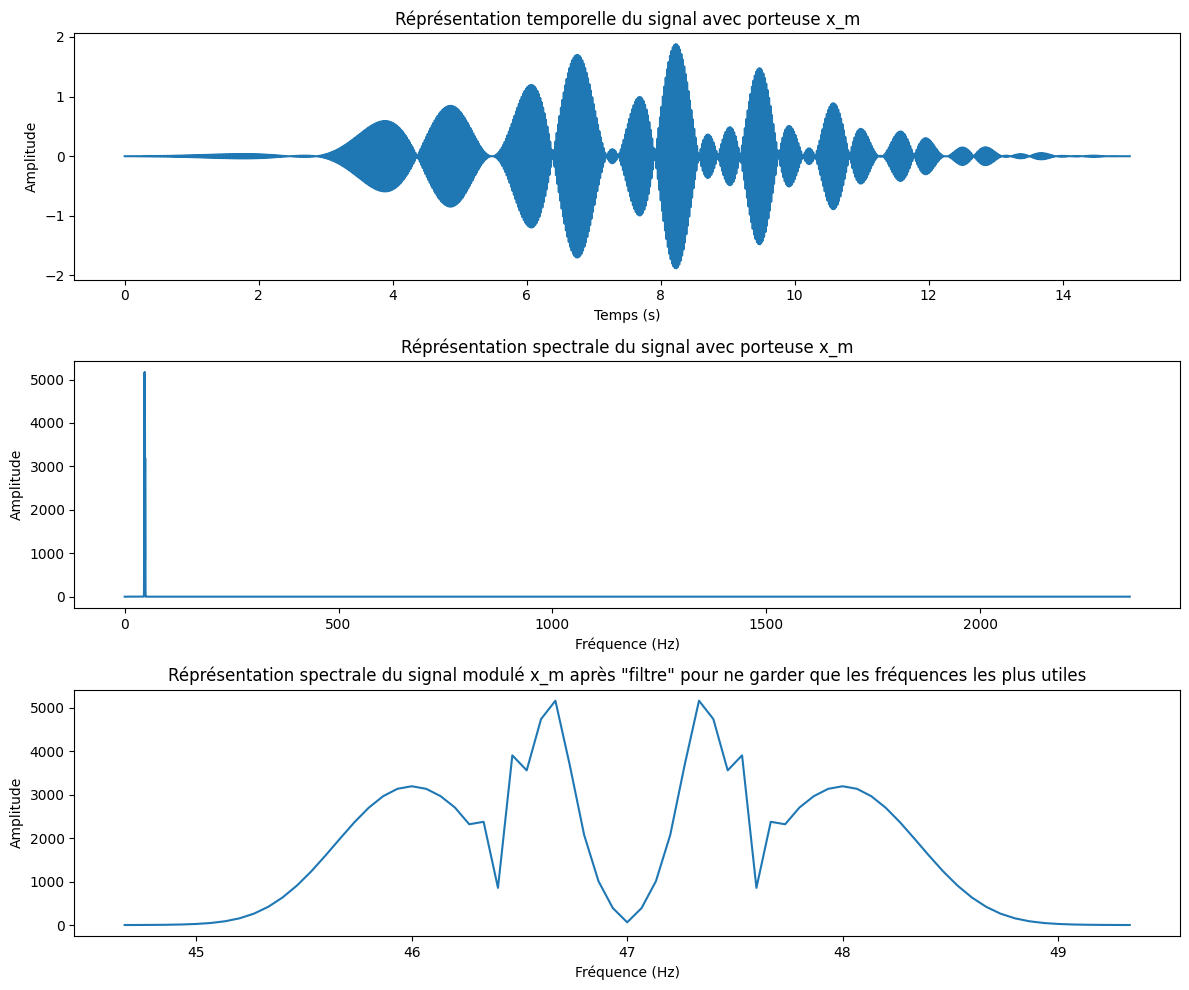

In [43]:
#fabrication du signal modul√©
x_m=x*np.cos(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))


#Repr√©sentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_m)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal avec porteuse x_m')


#Repr√©sentation de la fft du signal

X_m=np.fft.fft(x_m)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_m[:N//2]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal avec porteuse x_m')

indice_√†_garder = np.abs(X_m) > 1
X_m_tild=X_m[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild[freq_tild>=0],np.abs(X_m_tild[freq_tild>=0]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_m apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()


On parle de **DSB-SC**, ou "Double sideband-suppressed carrier" (ou encore Modulation √† double bande lat√©rale et porteuse supprim√©e) car **l'onde modul√©e est seulement constitu√©e des bandes lat√©rales sup√©rieure et inf√©rieure du signal**.

### B. D√©modulation synchrone ‚Äúanalogique‚Äù

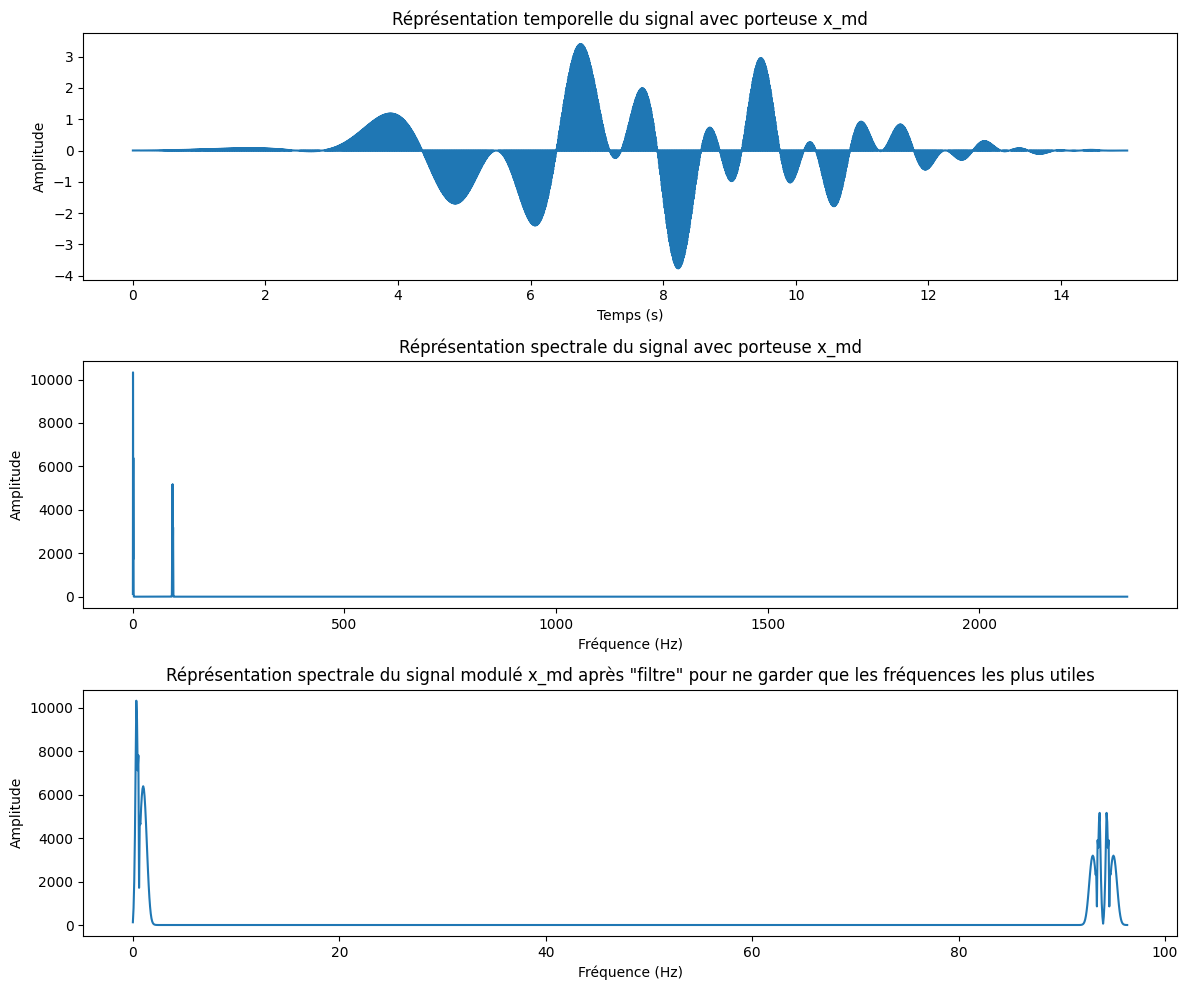

In [44]:
#fabrication du signal modul√©
x_md=2*x_m*np.cos(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))

#Repr√©sentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_md)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal avec porteuse x_md')

X_md=np.fft.fft(x_md)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_md[:N//2]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal avec porteuse x_md')

indice_√†_garder = np.abs(X_md) > 1
X_md_tild=X_md[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild[freq_tild>=0],np.abs(X_md_tild[freq_tild>=0]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_md apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()


La fonction de transfert d'un filtre passe bas du premier ordre est: $H(j \omega)=\frac{1}{1+j\tau \omega}$. Si $s(t)$ est le signal de sortie du filtre correspondant √† une entr√©e $e(t)$, l'√©quation diff√©rentielle associ√©e est: $\tau \frac{ds(t)}{dt} + s(t) = e(t)$. 

L'√©quation discr√©tis√©e est alors: $\tau \frac{s_{n+1}-s_{n}}{dt} + s_n = e_n$ (approximation d'Euler), o√π $dt$ est le pas d'it√©ration. Donc $s_{n+1}= \frac{dt}{\tau}(e_n - s_n) +s_n$.

La fr√©quence de coupure du filtre est $ f_{coup}=\frac{1}{2    \pi \tau}$, on a ainsi :
 $$s_{n+1}= 2 \pi f_{coup}(e_n - s_n)dt  +s_n$$

On r√©alise cet algorithme en prenant un pas d'it√©ration tr√®s petit et en consid√©rant $f_{coup}= 20Hz$ au vu des trac√©s et √©tudes pr√©c√©dentes (afin de ne garder que la partie spectrale du signal initial et de supprimer la partie spectrale du √† la modulation).


c:\miniconda\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


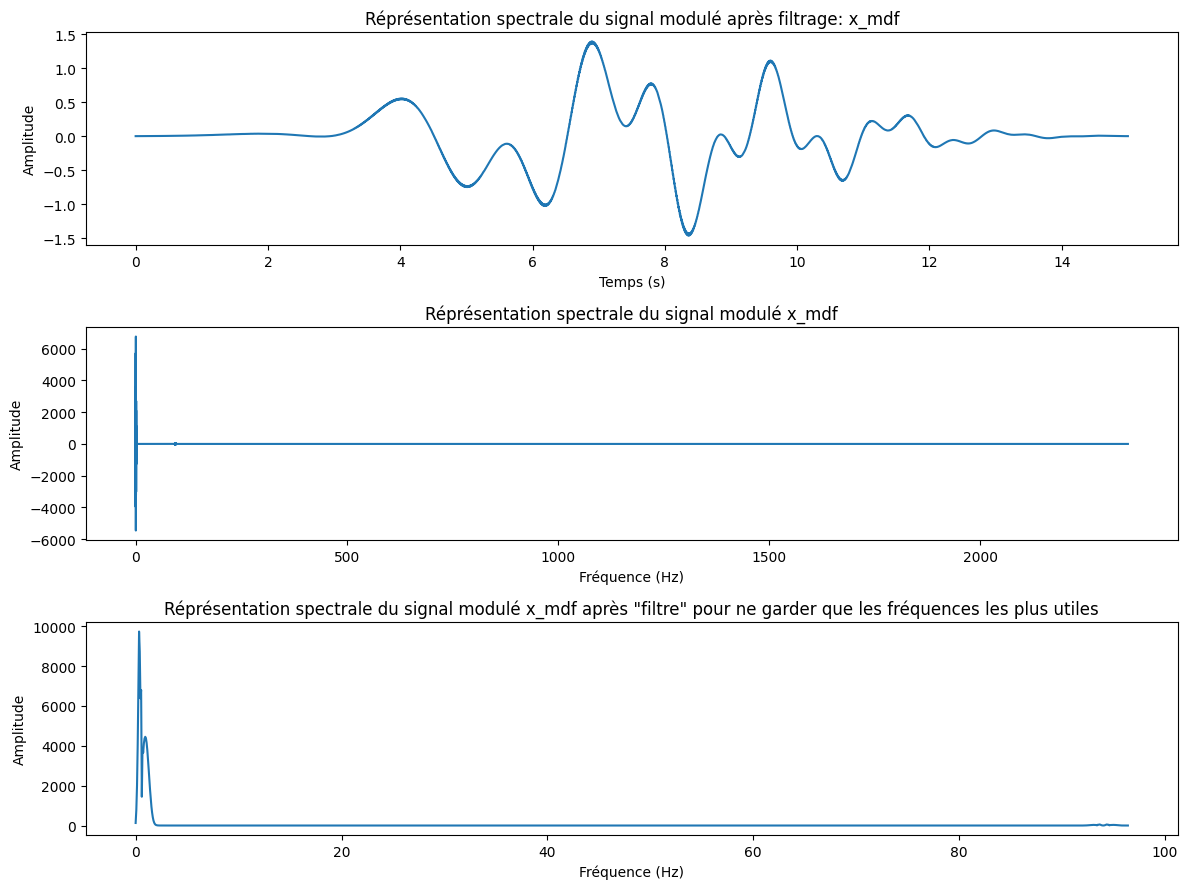

In [45]:
#filtre passe bas de fr√©quence de coupure: HZ

N_md=len(x_md)
dt=1e-5
f_coup=20


x_mdf=np.zeros(N_md)
x_mdf[0]=0 #on prend comme valeur initiale 0 (cf d√©but du sujet)
for i in range(1,N_md):
    x_mdf[i]=dt*2*np.pi*f_coup*(x_md[i-1] - x_mdf[i-1]) + x_mdf[i-1]




#Repr√©sentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t,x_mdf)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© apr√®s filtrage: x_mdf')


X_mdf=np.fft.fft(x_mdf)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],X_mdf[:N//2])
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_mdf')

indice_√†_garder = np.abs(X_mdf) > 0.01
X_mdf_tild=X_mdf[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_tild[freq_tild>=0],np.abs(X_mdf_tild[freq_tild>=0]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_mdf apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()

On retrouve le signal initial et son spectre. La partie spectrale de la modulation reste tout de m√™me tr√®s l√©germent pr√©sente (au niveau de 97Hz), on pourrait, pour palier cela, utiliser un filtre passe bas d'ordre sup√©rieur.


Il faudrait √©chantillonner $x_{mdf}$ √† une fr√©quence d'au moins $2f_{max}= 2* 1,75= 3,5Hz$.


la d√©modulation pr√©sent√©e ici se fait d‚Äôhabitude avec
des composants analogiques. Serait-il possible de r√©aliser num√©riquement le m√™me traitement apr√®s avoir
√©chantillonn√© ùë•_ùëö ? Quelle est la fr√©quence minimale
d‚Äô√©chantillonnage possible ?


### C. D√©modulation synchrone par sous-√©chantillonnage


[]

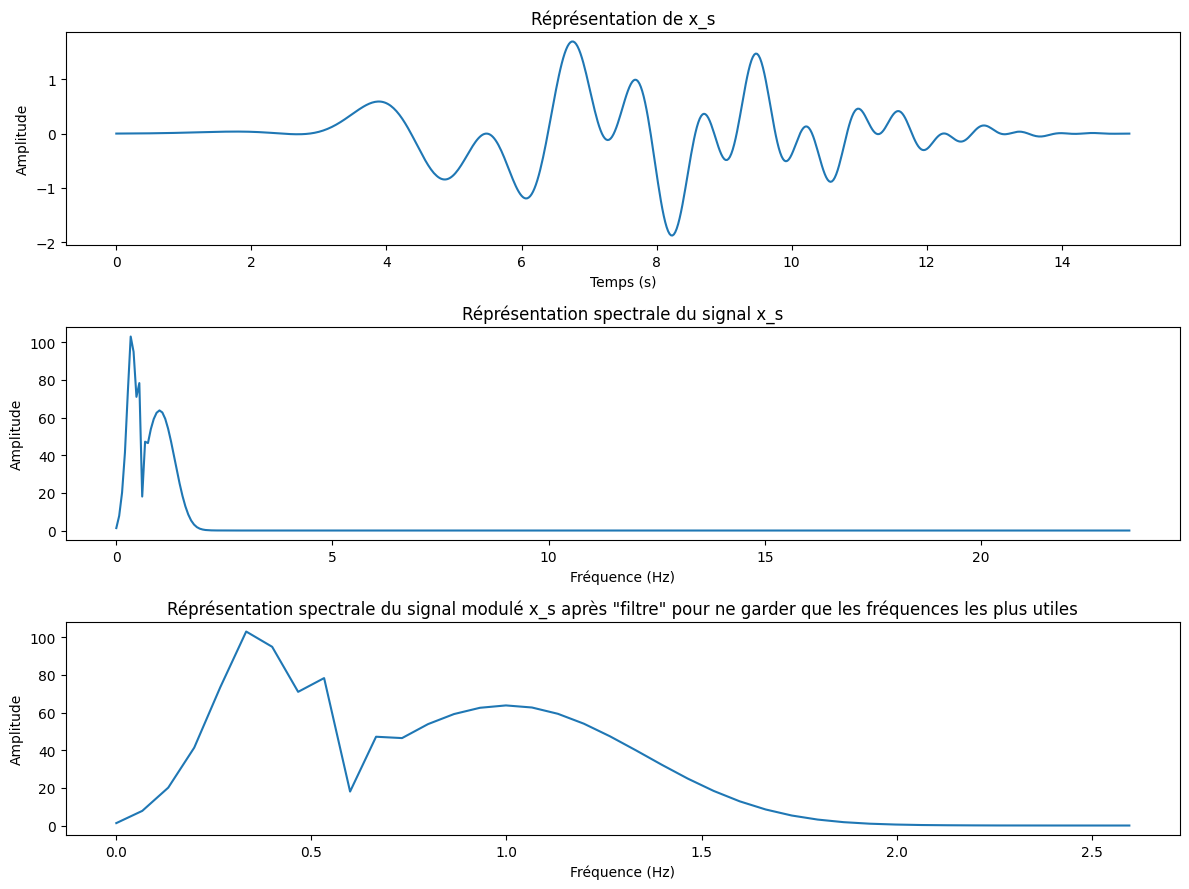

In [46]:
n=1
N_m=len(x_m)
f_s=fc/n
dt=1/f_s #pas d'√©chantillonnage

x_s=[]
t1=[]
t_comp=int(0)

while t_comp<T:

    indice=int(np.floor(t_comp*N_m/T))
    x_s.append(x_m[indice])
    t1.append(t_comp)
    t_comp+=dt

x_s=np.array(x_s)
t1=np.array(t1)

#Repr√©sentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t1,x_s)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation de x_s')


X_s=np.fft.fft(x_s)
freq_s=np.fft.fftfreq(len(X_s), d=1/f_s)

plt.subplot(3, 1, 2)
plt.plot(freq_s[freq_s>=0],np.abs(X_s[freq_s>=0]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal x_s')

indice_√†_garder = np.abs(X_s) > 0.01
X_s_tild=X_s[indice_√†_garder]
freq_s_tild=freq_s[indice_√†_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_s_tild[freq_s_tild>=0],np.abs(X_s_tild[freq_s_tild>=0]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_s apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.plot()


 
On retrouve le signal initial. Cependant sons spectre n'est pas identique (modification de la valeur des amplitudes spectrales).

Cette m√©thode permet de se d√©barasser des fr√©quences du √† la modulation, i.e. sup√©rieures √† 90Hz (cela est possible en echantillonnant √† une fr√©quence 47Hz).



 Conclusion ? Quelle est la
fr√©quence minimale d‚Äô√©chantillonnage possible ?
‚Äî int√©r√™t de cette proc√©dure ? Interpr√©tation temporelle et
fr√©quentielle ?


## II. Modulation-d√©modulation DSB-SC avec sinus

### A. Modulation


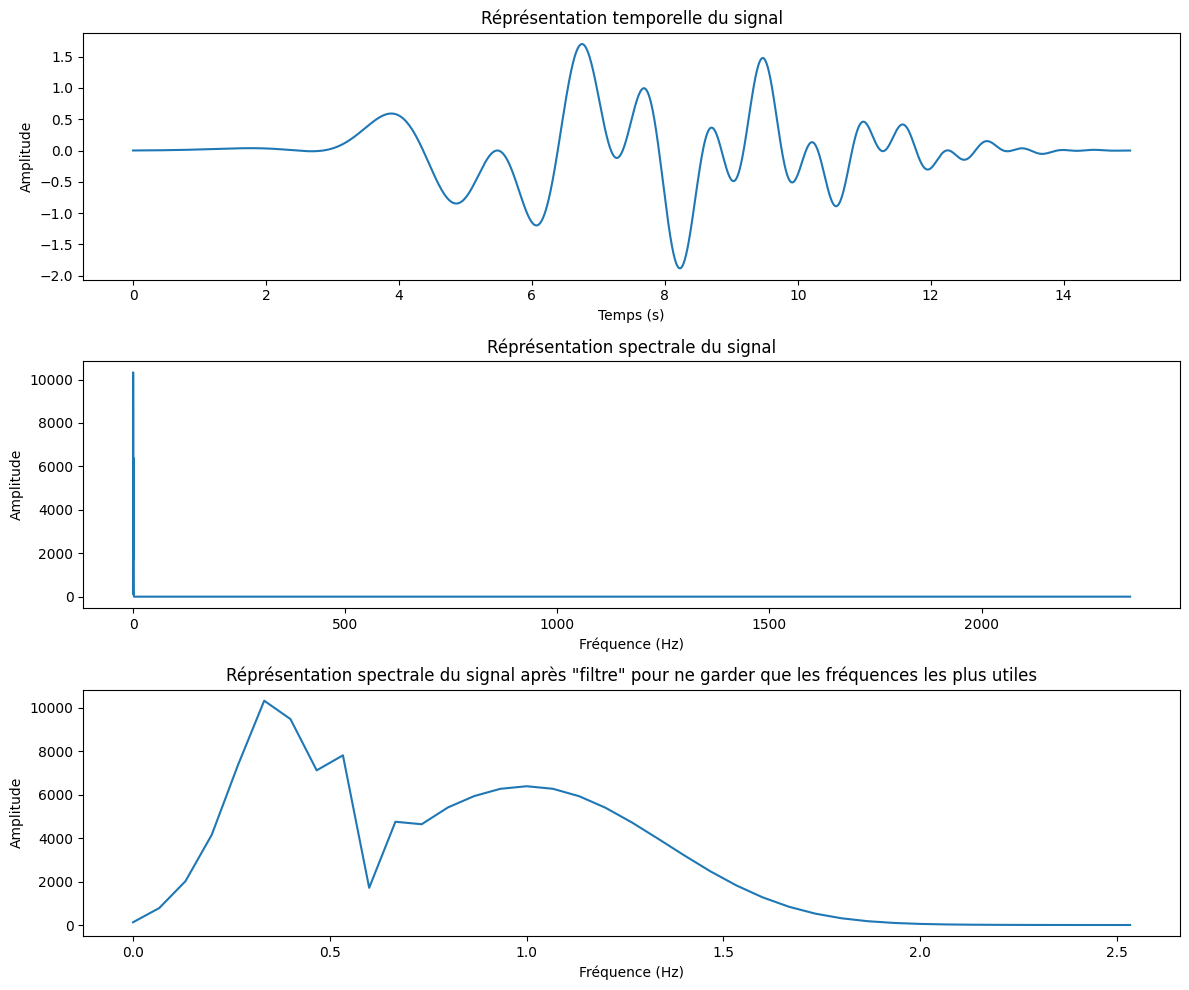

In [47]:
fc = 47.0 # carrier frequency
finfty = fc*1e2 # very high "continuous" frequency
T = 15. # duration of signal
N = round(finfty*T) # number of samples

t = np.arange(0.0, N)/finfty
pulsation1 = 2*np.pi*t/T
pulsation2 = 2*np.pi/np.sqrt(7)*t/T

xRaw = np.cos(pulsation1*t) + np.sin(pulsation2*t)

window = sig.windows.kaiser(N,9)
x = xRaw*window


plt.figure(figsize=(12, 10))

#Repr√©sentation temporelle du signal
plt.subplot(3, 1, 1)
plt.plot(t,x)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal')

#Repr√©sentation de la fft du signal

X=np.fft.fft(x)
freq=np.fft.fftfreq(N, d=1/finfty)



plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X[:N//2]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal')

indice_√†_garder = np.abs(X) > 1
X_tild=X[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild[freq_tild>=0],np.abs(X_tild[freq_tild>=0]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()

La Fr√©quence maximale du signal est approximativement **B=2Hz**.


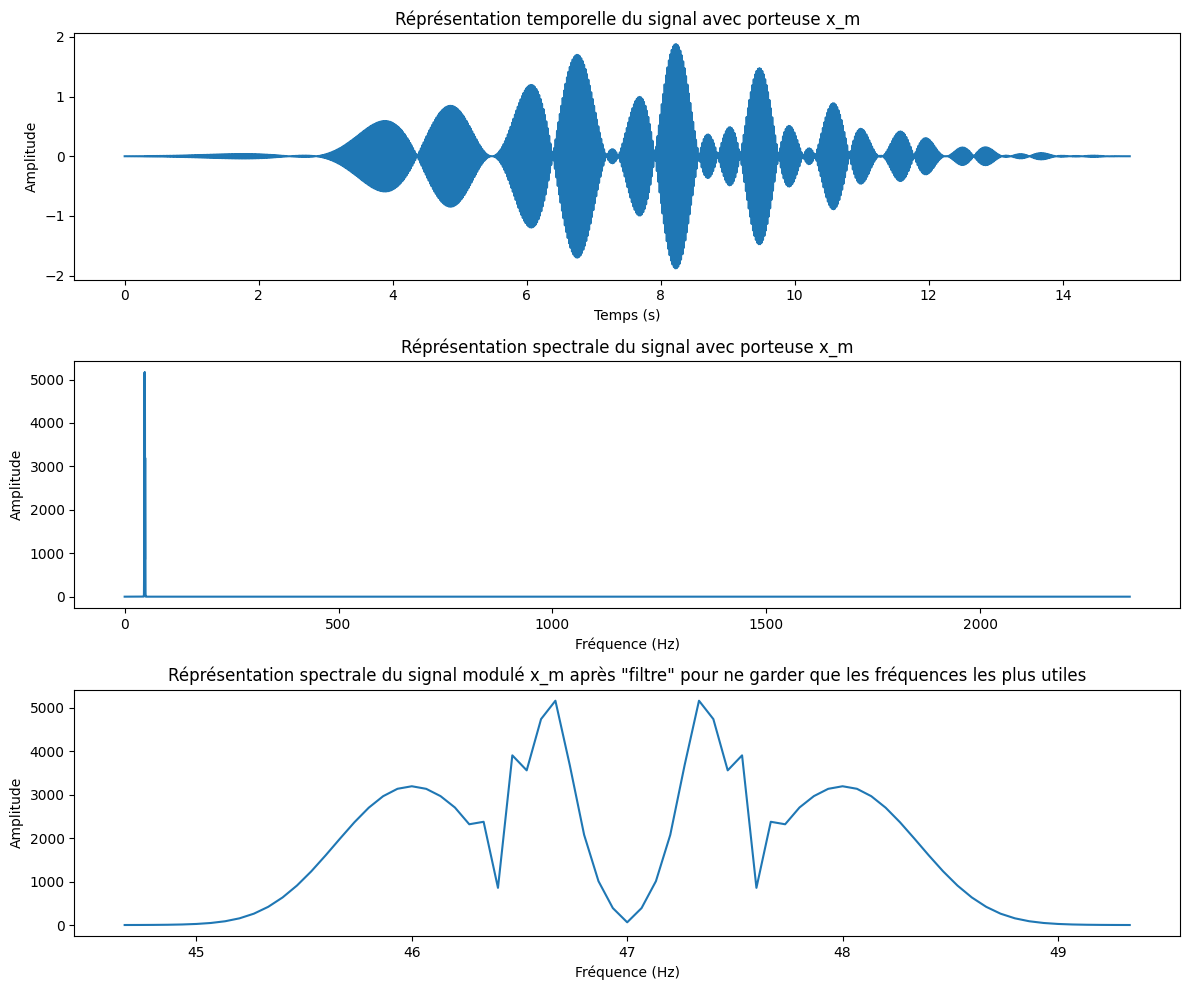

In [48]:
#fabrication du signal modul√©
x_m=x*np.sin(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))


#Repr√©sentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_m)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal avec porteuse x_m')


#Repr√©sentation de la fft du signal

X_m=np.fft.fft(x_m)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_m[:N//2]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal avec porteuse x_m')

indice_√†_garder = np.abs(X_m) > 1
X_m_tild=X_m[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild[freq_tild>=0],np.abs(X_m_tild[freq_tild>=0]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_m apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()


On parle de **DSB-SC**, ou "Double sideband-suppressed carrier" (ou encore Modulation √† double bande lat√©rale et porteuse supprim√©e) car **l'onde modul√©e est seulement constitu√©e des bandes lat√©rales sup√©rieure et inf√©rieure du signal**.

### B. D√©modulation synchrone ‚Äúanalogique‚Äù

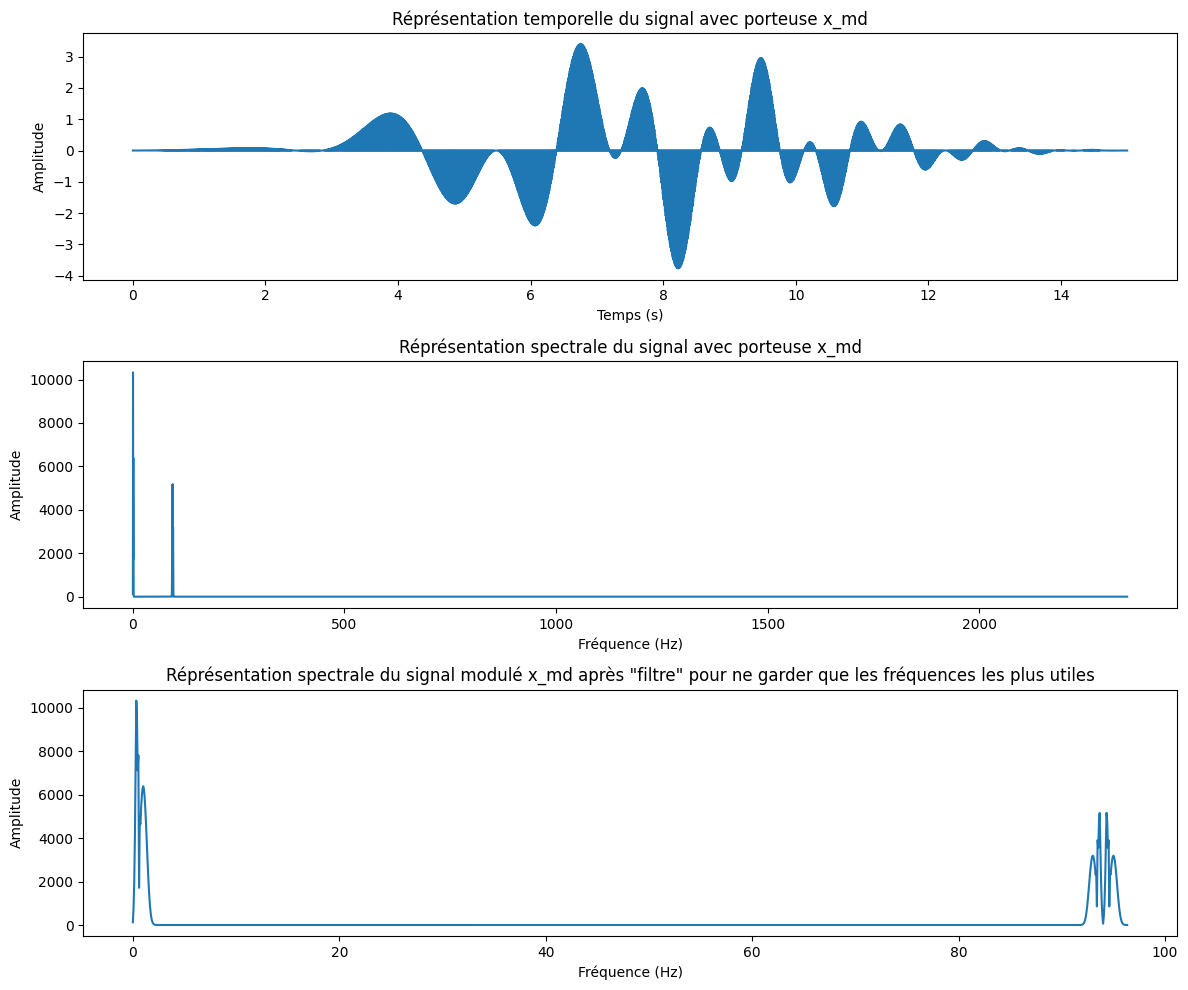

In [49]:
#fabrication du signal modul√©
x_md=2*x_m*np.sin(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))

#Repr√©sentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_md)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal avec porteuse x_md')

X_md=np.fft.fft(x_md)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_md[:N//2]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal avec porteuse x_md')

indice_√†_garder = np.abs(X_md) > 1
X_md_tild=X_md[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild[freq_tild>=0],np.abs(X_md_tild[freq_tild>=0]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_md apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()


La fonction de transfert d'un filtre passe bas du premier ordre est: $H(j \omega)=\frac{1}{1+j\tau \omega}$. Si $s(t)$ est le signal de sortie du filtre correspondant √† une entr√©e $e(t)$, l'√©quation diff√©rentielle associ√©e est: $\tau \frac{ds(t)}{dt} + s(t) = e(t)$. 

L'√©quation discr√©tis√©e est alors: $\tau \frac{s_{n+1}-s_{n}}{dt} + s_n = e_n$ (approximation d'Euler), o√π $dt$ est le pas d'it√©ration. Donc $s_{n+1}= \frac{dt}{\tau}(e_n - s_n) +s_n$.

La fr√©quence de coupure du filtre est $ f_{coup}=\frac{1}{2    \pi \tau}$, on a ainsi :
 $$s_{n+1}= 2 \pi f_{coup}(e_n - s_n)dt  +s_n$$

On r√©alise cet algorithme en prenant un pas d'it√©ration tr√®s petit et en consid√©rant $f_{coup}= 20Hz$ au vu des trac√©s et √©tudes pr√©c√©dentes (afin de ne garder que la partie spectrale du signal initial et de supprimer la partie spectrale du √† la modulation).


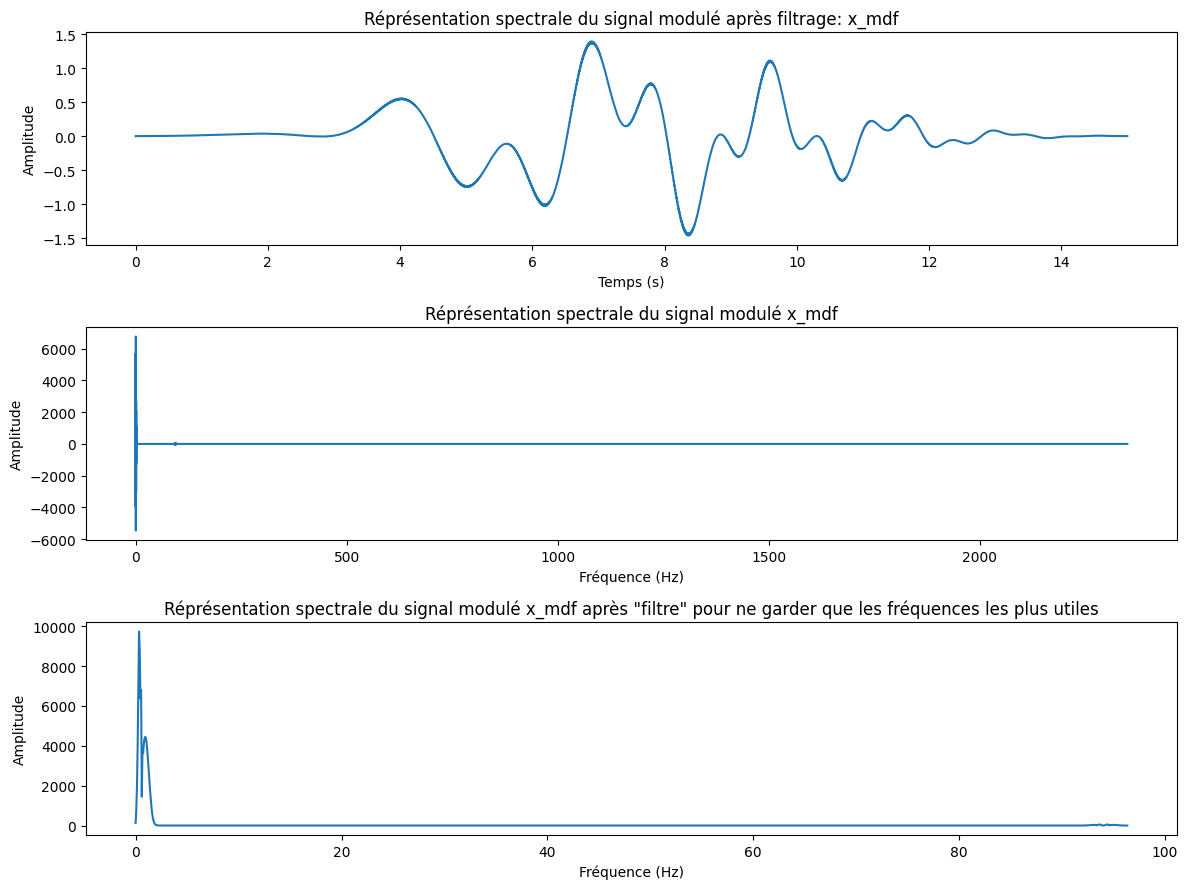

In [50]:
#filtre passe bas de fr√©quence de coupure: HZ

N_md=len(x_md)
dt=1e-5
f_coup=20


x_mdf=np.zeros(N_md)
x_mdf[0]=0 #on prend comme valeur initiale 0 (cf d√©but du sujet)
for i in range(1,N_md):
    x_mdf[i]=dt*2*np.pi*f_coup*(x_md[i-1] - x_mdf[i-1]) + x_mdf[i-1]




#Repr√©sentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t,x_mdf)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© apr√®s filtrage: x_mdf')


X_mdf=np.fft.fft(x_mdf)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],X_mdf[:N//2])
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_mdf')

indice_√†_garder = np.abs(X_mdf) > 0.01
X_mdf_tild=X_mdf[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_tild[freq_tild>=0],np.abs(X_mdf_tild[freq_tild>=0]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_mdf apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()

On retrouve le signal initial et son spectre. La partie spectrale de la modulation reste tout de m√™me tr√®s l√©germent pr√©sente (au niveau de 97Hz), on pourrait, pour palier cela, utiliser un filtre passe bas d'ordre sup√©rieur.


Il faudrait √©chantillonner $x_{mdf}$ √† une fr√©quence d'au moins $2f_{max}= 2* 1,75= 3,5Hz$.


la d√©modulation pr√©sent√©e ici se fait d‚Äôhabitude avec
des composants analogiques. Serait-il possible de r√©aliser num√©riquement le m√™me traitement apr√®s avoir
√©chantillonn√© ùë•_ùëö ? Quelle est la fr√©quence minimale
d‚Äô√©chantillonnage possible ?


### C. D√©modulation synchrone par sous-√©chantillonnage


Cette fois ci, afin de tenir ocmpte du fait que la modulation s'est faite avec la fonction $sinus$, on ajoute un d√©calage temporel de $\frac{1}{4f_c}$.

[]

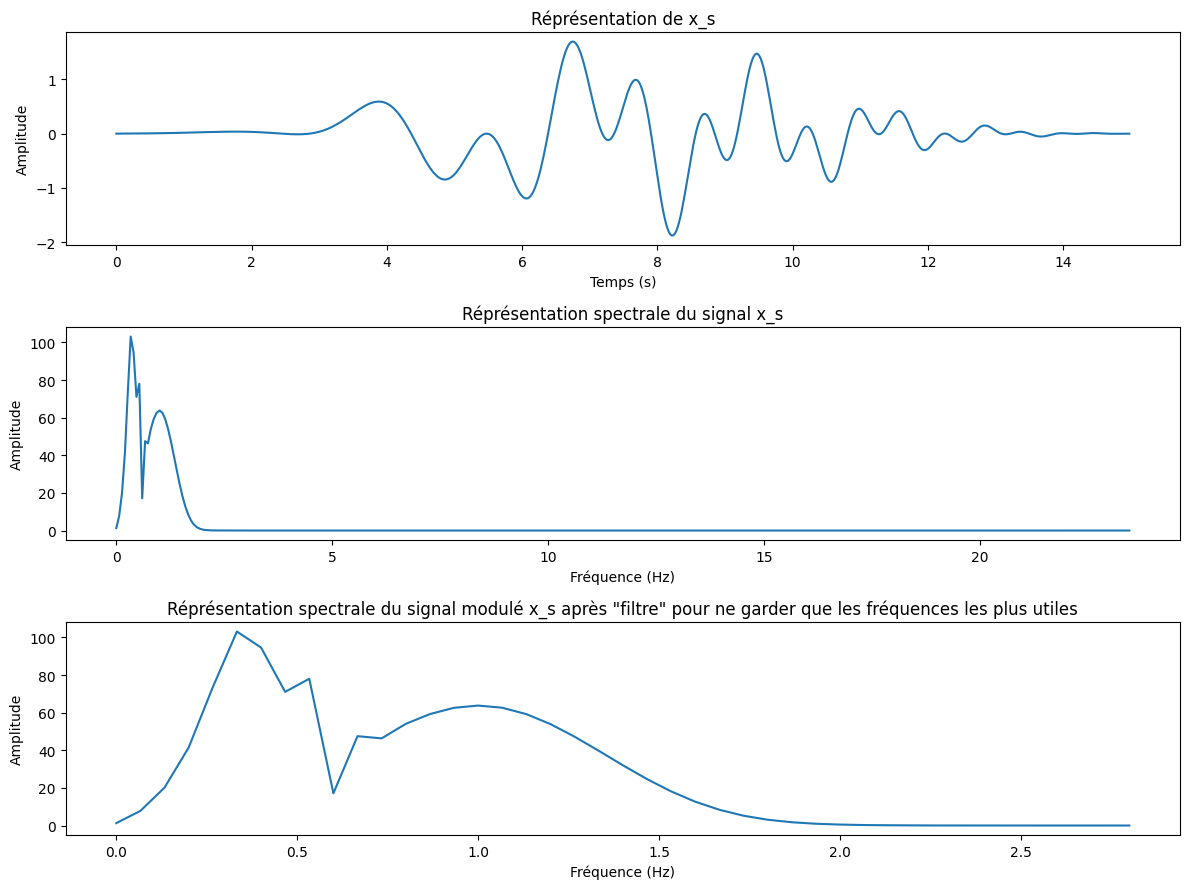

In [79]:
n=1

N_m=len(x_m)
f_s=fc/n
dt=1/f_s #pas d'√©chantillonnage

x_s=[]
t1=[]
t_comp=int(0)
indice=0
while indice<(N_m-1):
    x_s.append(x_m[indice])
    t1.append(t_comp)
    t_comp+=dt
    indice=int(np.floor((t_comp+1/(4*fc))*N_m/T))


x_s=np.array(x_s)
t1=np.array(t1)

#Repr√©sentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t1,x_s)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation de x_s')


X_s=np.fft.fft(x_s)
freq_s=np.fft.fftfreq(len(X_s), d=1/f_s)

plt.subplot(3, 1, 2)
plt.plot(freq_s[freq_s>=0],np.abs(X_s[freq_s>=0]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal x_s')

indice_√†_garder = np.abs(X_s) > 0.01
X_s_tild=X_s[indice_√†_garder]
freq_s_tild=freq_s[indice_√†_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_s_tild[freq_s_tild>=0],np.abs(X_s_tild[freq_s_tild>=0]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_s apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.plot()

On ne retrouve pas le signal initial. Cependant sons spectre n'est pas identique (modification de la valeur des amplitudes spectrales).

Cette m√©thode permet de se d√©barasser des fr√©quences du √† la modulation, i.e. sup√©rieures √† 90Hz (cela est possible en echantillonnant √† une fr√©quence 47Hz).



 Conclusion ? Quelle est la
fr√©quence minimale d‚Äô√©chantillonnage possible ?
‚Äî int√©r√™t de cette proc√©dure ? Interpr√©tation temporelle et
fr√©quentielle ?

## III. Modulation et d√©modulation QAM (Quadrature Amplitude Modulation)

La modulation DSB-SC ‚Äúgaspille‚Äù de la bande passante ;
pourquoi ? En s‚Äôinspirant des r√©sultats de la section pr√©c√©dente,
montrer qu‚Äôon peut transmettre deux signaux ùë•ùêº (ùë°) et ùë•ùëÑ (ùë°)
en m√™me temps
QUestion autre que code du I

### A. Modulation

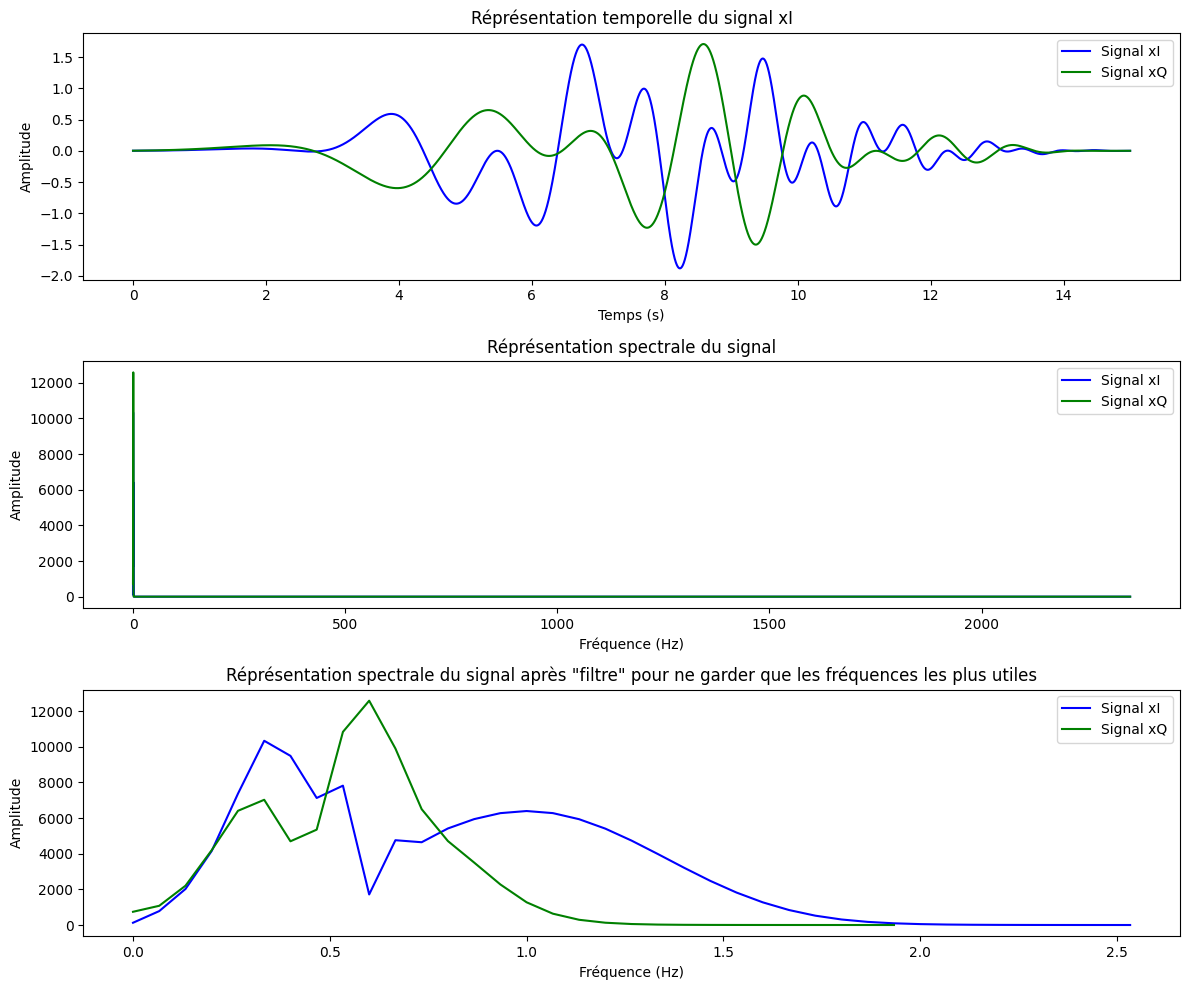

In [52]:
fc = 47.0 # carrier frequency
finfty = fc*1e2 # very high "continuous" frequency
T = 15. # duration of signal
N = round(finfty*T) # number of samples

t = np.arange(0.0, N)/finfty
pulsation1 = 2*np.pi*t/T
pulsation2 = 2*np.pi/np.sqrt(7)*t/T

xRawI = np.cos(pulsation1*t) + np.sin(pulsation2*t)
xRawQ = np.cos(pulsation1*t*3/5) + np.cos(pulsation2*t*10/9)


window = sig.windows.kaiser(N,9)
xI = xRawI*window
xQ = xRawQ*window


plt.figure(figsize=(12, 10))

#Repr√©sentation temporelle du signal
plt.subplot(3, 1, 1)
plt.plot(t,xI,color='blue', label='Signal xI')
plt.plot(t,xQ, color ='green', label='Signal xQ')

plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal xI')
plt.legend(loc='upper right')

#Repr√©sentation de la fft du signal

XI=np.fft.fft(xI)
freqI=np.fft.fftfreq(N, d=1/finfty)
XQ=np.fft.fft(xQ)
freqQ=np.fft.fftfreq(N, d=1/finfty)



plt.subplot(3,1, 2)
plt.plot(freqI[:N//2],np.abs(XI[:N//2]), color='blue', label='Signal xI') 
plt.plot(freqQ[:N//2],np.abs(XQ[:N//2]), color ='green', label='Signal xQ')  

plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal')
plt.legend(loc='upper right')

indice_√†_garderI = np.abs(XI) > 1
X_tildI=XI[indice_√†_garderI]
freq_tildI=freqI[indice_√†_garderI]
indice_√†_garderQ = np.abs(XQ) > 1
X_tildQ=XQ[indice_√†_garderQ]
freq_tildQ=freqQ[indice_√†_garderQ]


plt.subplot(3, 1, 3)
plt.plot(freq_tildI[freq_tildI>=0],np.abs(X_tildI[freq_tildI>=0]), color ='blue', label='Signal xI')  
plt.plot(freq_tildQ[freq_tildQ>=0],np.abs(X_tildQ[freq_tildQ>=0]), color ='green', label='Signal xQ')  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')
plt.legend(loc='upper right')


plt.tight_layout()
plt.show()


La fr√©quence maximale est alors d'environ $B=1,9Hz$.

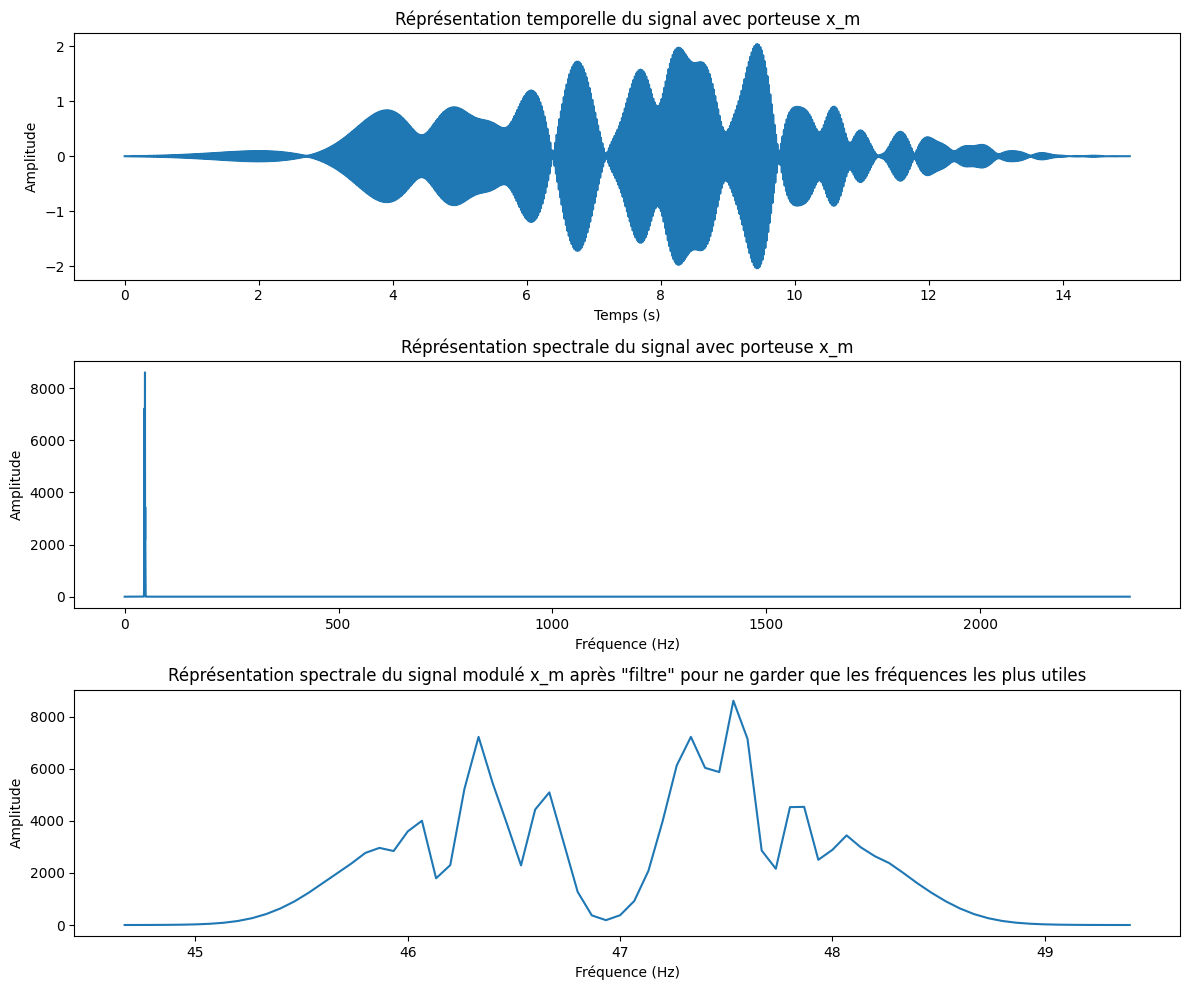

In [53]:
#fabrication du signal modul√©
x_mIQ=xI*np.cos(2*np.pi*fc*t)+xQ*np.sin(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))


#Repr√©sentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_mIQ)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal avec porteuse x_m')


#Repr√©sentation de la fft du signal

X_mIQ=np.fft.fft(x_mIQ)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_mIQ[:N//2]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal avec porteuse x_m')

indice_√†_garder = np.abs(X_mIQ) > 1
X_m_tildIQ=X_mIQ[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild[freq_tild>=0],np.abs(X_m_tildIQ[freq_tild>=0]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_m apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()


### B. D√©modulation synchrone "analogique"

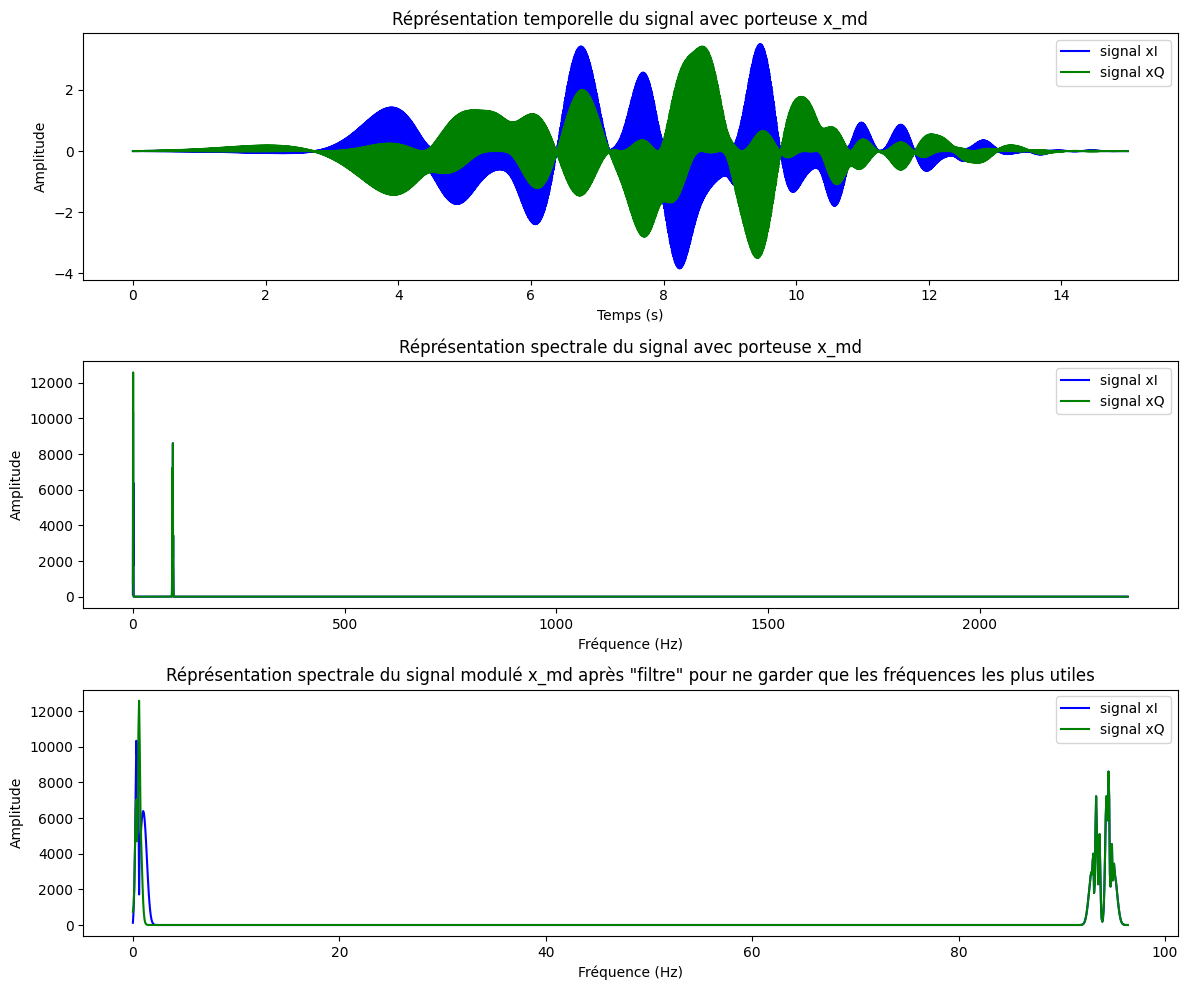

In [54]:
#fabrication du signal modul√©
x_mdI=2*x_mIQ*np.cos(2*np.pi*fc*t)
x_mdQ=2*x_mIQ*np.sin(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))

#Repr√©sentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_mdI, color='blue', label='signal xI')
plt.plot(t,x_mdQ, color='green', label='signal xQ')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal avec porteuse x_md')
plt.legend(loc='upper right')

X_mdI=np.fft.fft(x_mdI)
freqI=np.fft.fftfreq(N, d=1/finfty)
X_mdQ=np.fft.fft(x_mdQ)
freqQ=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freqI[:N//2],np.abs(X_mdI[:N//2]), color='blue', label='signal xI')
plt.plot(freqQ[:N//2],np.abs(X_mdQ[:N//2]), color='green', label='signal xQ')
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal avec porteuse x_md')
plt.legend(loc='upper right')

indice_√†_garderI = np.abs(X_mdI) > 1
X_md_tildI=X_mdI[indice_√†_garderI]
freq_tildI=freqI[indice_√†_garderI]
indice_√†_garderQ = np.abs(X_mdQ) > 1
X_md_tildQ=X_mdQ[indice_√†_garderQ]
freq_tildQ=freqQ[indice_√†_garderQ]

plt.subplot(3, 1, 3)
plt.plot(freq_tildI[freq_tildI>=0],np.abs(X_md_tildI[freq_tildI>=0]), color='blue', label='signal xI') 
plt.plot(freq_tildQ[freq_tildQ>=0],np.abs(X_md_tildQ[freq_tildQ>=0]), color='green', label='signal xQ')  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_md apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


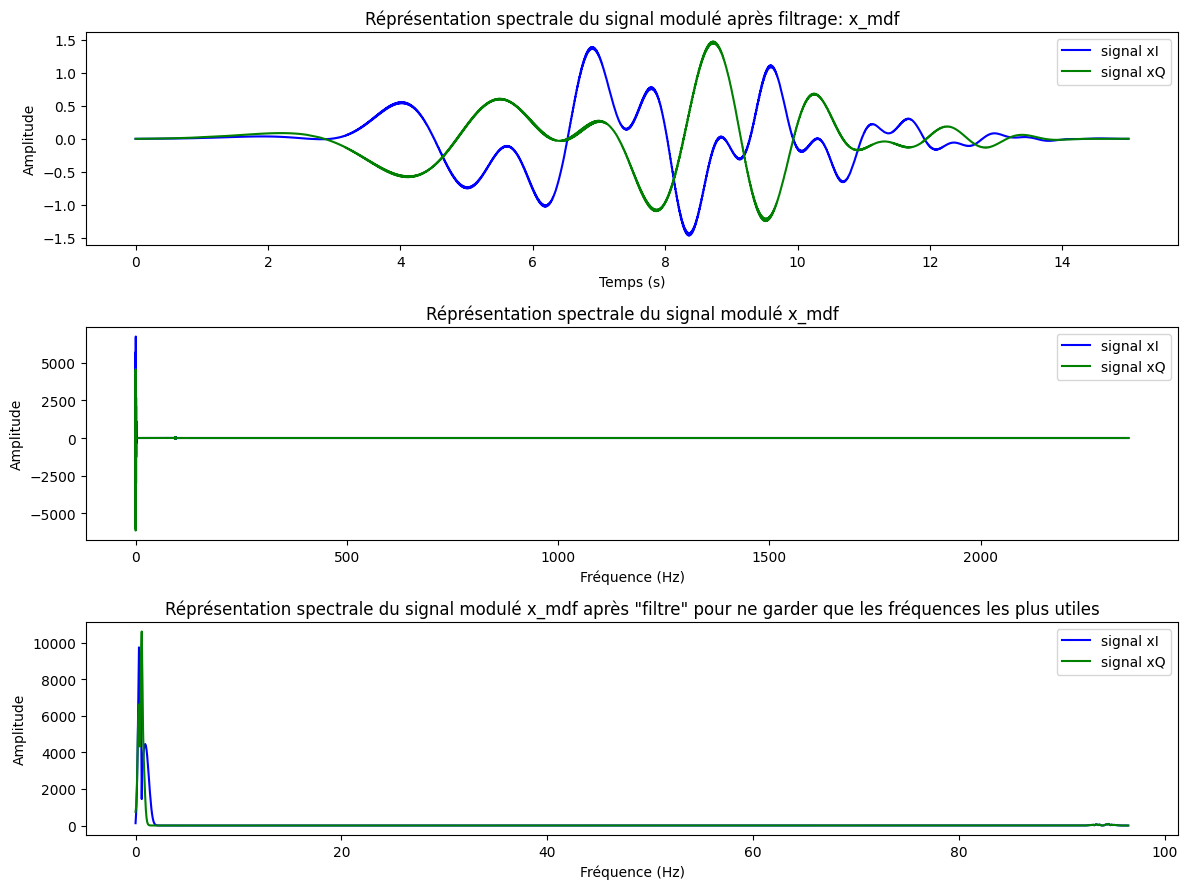

In [55]:
#filtre passe bas de fr√©quence de coupure: HZ

N_mdI=len(x_mdI)
N_mdQ=len(x_mdQ)
dt=1e-5
f_coup=20

x_mdfI=np.zeros(N_mdI)
x_mdfQ=np.zeros(N_mdQ)

x_mdfI[0]=0 #on prend comme valeur initiale 0 (cf d√©but du sujet)
x_mdfQ[0]=0 #on prend comme valeur initiale 0 (cf d√©but du sujet)

for i in range(1,N_mdI):
    x_mdfI[i]=dt*2*np.pi*f_coup*(x_mdI[i-1] - x_mdfI[i-1]) + x_mdfI[i-1]
for i in range(1,N_mdQ):
    x_mdfQ[i]=dt*2*np.pi*f_coup*(x_mdQ[i-1] - x_mdfQ[i-1]) + x_mdfQ[i-1]

#Repr√©sentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t,x_mdfI, color='blue', label='signal xI')
plt.plot(t,x_mdfQ, color='green', label='signal xQ')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© apr√®s filtrage: x_mdf')
plt.legend(loc='upper right')

X_mdfI=np.fft.fft(x_mdfI)
freqI=np.fft.fftfreq(N, d=1/finfty)
X_mdfQ=np.fft.fft(x_mdfQ)
freqQ=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freqI[:N//2],X_mdfI[:N//2], color='blue', label='signal xI')
plt.plot(freqQ[:N//2],X_mdfQ[:N//2], color='green', label='signal xQ')
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_mdf')
plt.legend(loc='upper right')


indice_√†_garderI = np.abs(X_mdfI) > 0.01
X_mdf_tildI=X_mdfI[indice_√†_garderI]
freq_tildI=freqI[indice_√†_garderI]
indice_√†_garderQ = np.abs(X_mdfQ) > 0.01
X_mdf_tildQ=X_mdfQ[indice_√†_garderQ]
freq_tildQ=freqQ[indice_√†_garderQ]

plt.subplot(3, 1, 3)

plt.plot(freq_tildI[freq_tildI>=0],np.abs(X_mdf_tildI[freq_tildI>=0]), color='blue', label='signal xI')  
plt.plot(freq_tildQ[freq_tildQ>=0],np.abs(X_mdf_tildQ[freq_tildQ>=0]), color='green', label='signal xQ')  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_mdf apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')
plt.legend(loc='upper right')


plt.tight_layout()
plt.show()

### C. D√©modulation synchrone par sous-√©chantillonnage

[]

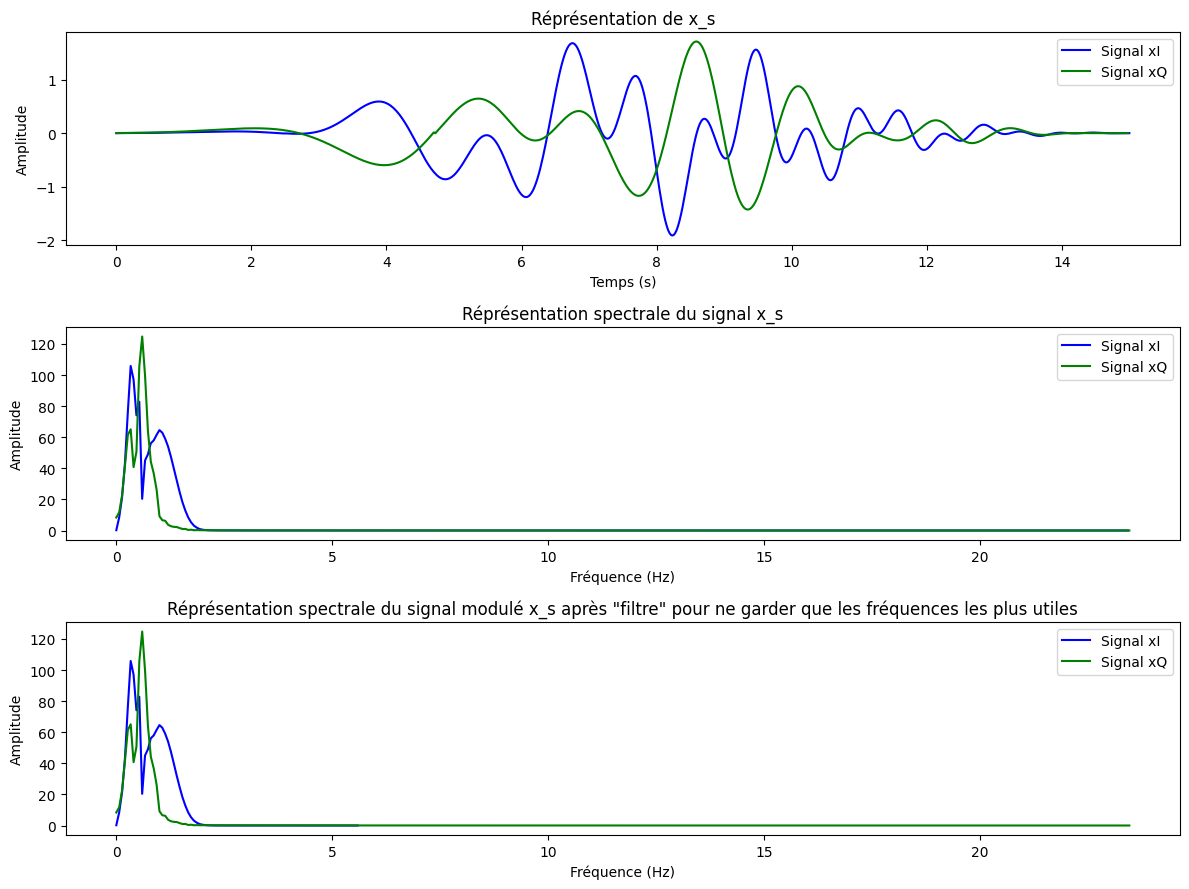

In [85]:
n=1
N_m=len(x_mIQ)
f_s=fc/n
dt=1/f_s #pas d'√©chantillonnage

x_sI=[]
t1I=[]
t_compI=int(0)

while t_compI<T:
    indice=int(np.floor(t_compI*N_m/T))
    x_sI.append(x_mIQ[indice])
    t1I.append(t_compI)
    t_compI+=dt

x_sQ=[]
t1Q=[]
t_compQ=int(0)
indiceQ=0
while indiceQ<(N_m-1):
    x_sQ.append(x_mIQ[indiceQ])
    t1Q.append(t_compQ)
    t_compQ+=dt
    indiceQ=int(np.floor((t_compQ+1/(4*fc))*N_m/T))


x_sI=np.array(x_sI)
t1I=np.array(t1I)
x_sQ=np.array(x_sQ)
t1Q=np.array(t1Q)


#Repr√©sentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t1I,x_sI, color='blue', label='Signal xI')
plt.plot(t1Q,x_sQ, color='green', label='Signal xQ')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation de x_s')
plt.legend(loc='upper right')

X_sI=np.fft.fft(x_sI)
freq_sI=np.fft.fftfreq(len(X_sI), d=1/f_s)
X_sQ=np.fft.fft(x_sQ)
freq_sQ=np.fft.fftfreq(len(X_sQ), d=1/f_s)

plt.subplot(3, 1, 2)
plt.plot(freq_sI[freq_sI>=0],np.abs(X_sI[freq_sI>=0]), color='blue', label='Signal xI')
plt.plot(freq_sQ[freq_sQ>=0],np.abs(X_sQ[freq_sQ>=0]), color='green', label='Signal xQ')
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal x_s')
plt.legend(loc='upper right')

indice_√†_garderI = np.abs(X_sI) > 0.01
X_s_tildI=X_sI[indice_√†_garderI]
freq_s_tildI=freq_sI[indice_√†_garderI]
indice_√†_garderQ = np.abs(X_sQ) > 0.01
X_s_tildQ=X_sQ[indice_√†_garderQ]
freq_s_tildQ=freq_sQ[indice_√†_garderQ]

plt.subplot(3, 1, 3)
plt.plot(freq_s_tildI[freq_s_tildI>=0],np.abs(X_s_tildI[freq_s_tildI>=0]), color='blue', label='Signal xI')  
plt.plot(freq_s_tildQ[freq_s_tildQ>=0],np.abs(X_s_tildQ[freq_s_tildQ>=0]), color='green', label='Signal xQ')  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_s apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')
plt.legend(loc='upper right')

plt.tight_layout()
plt.plot()

## IV. Modulation et d√©modulation SSB-SC (Single-SideBand Supressed-Carrier)

Si on n‚Äôa q‚Äôun seul signal ùë•(ùë°) √† transmettre, une autre
fa√ßon d‚Äô√©conomiser la bande passante est la modulation √†
bande unique ‚ÄúSSB-SC‚Äù ; pourquoi ? Reprendre les questions
les questions de la partie I dans ce cas (pour la modulation,
on pourra utiliser la fonction scipy.signal.hilbert).
